In [25]:
import numpy as numpy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
from geotext import GeoText
import pycountry
import numpy as np

from collections import Counter
from collections import defaultdict

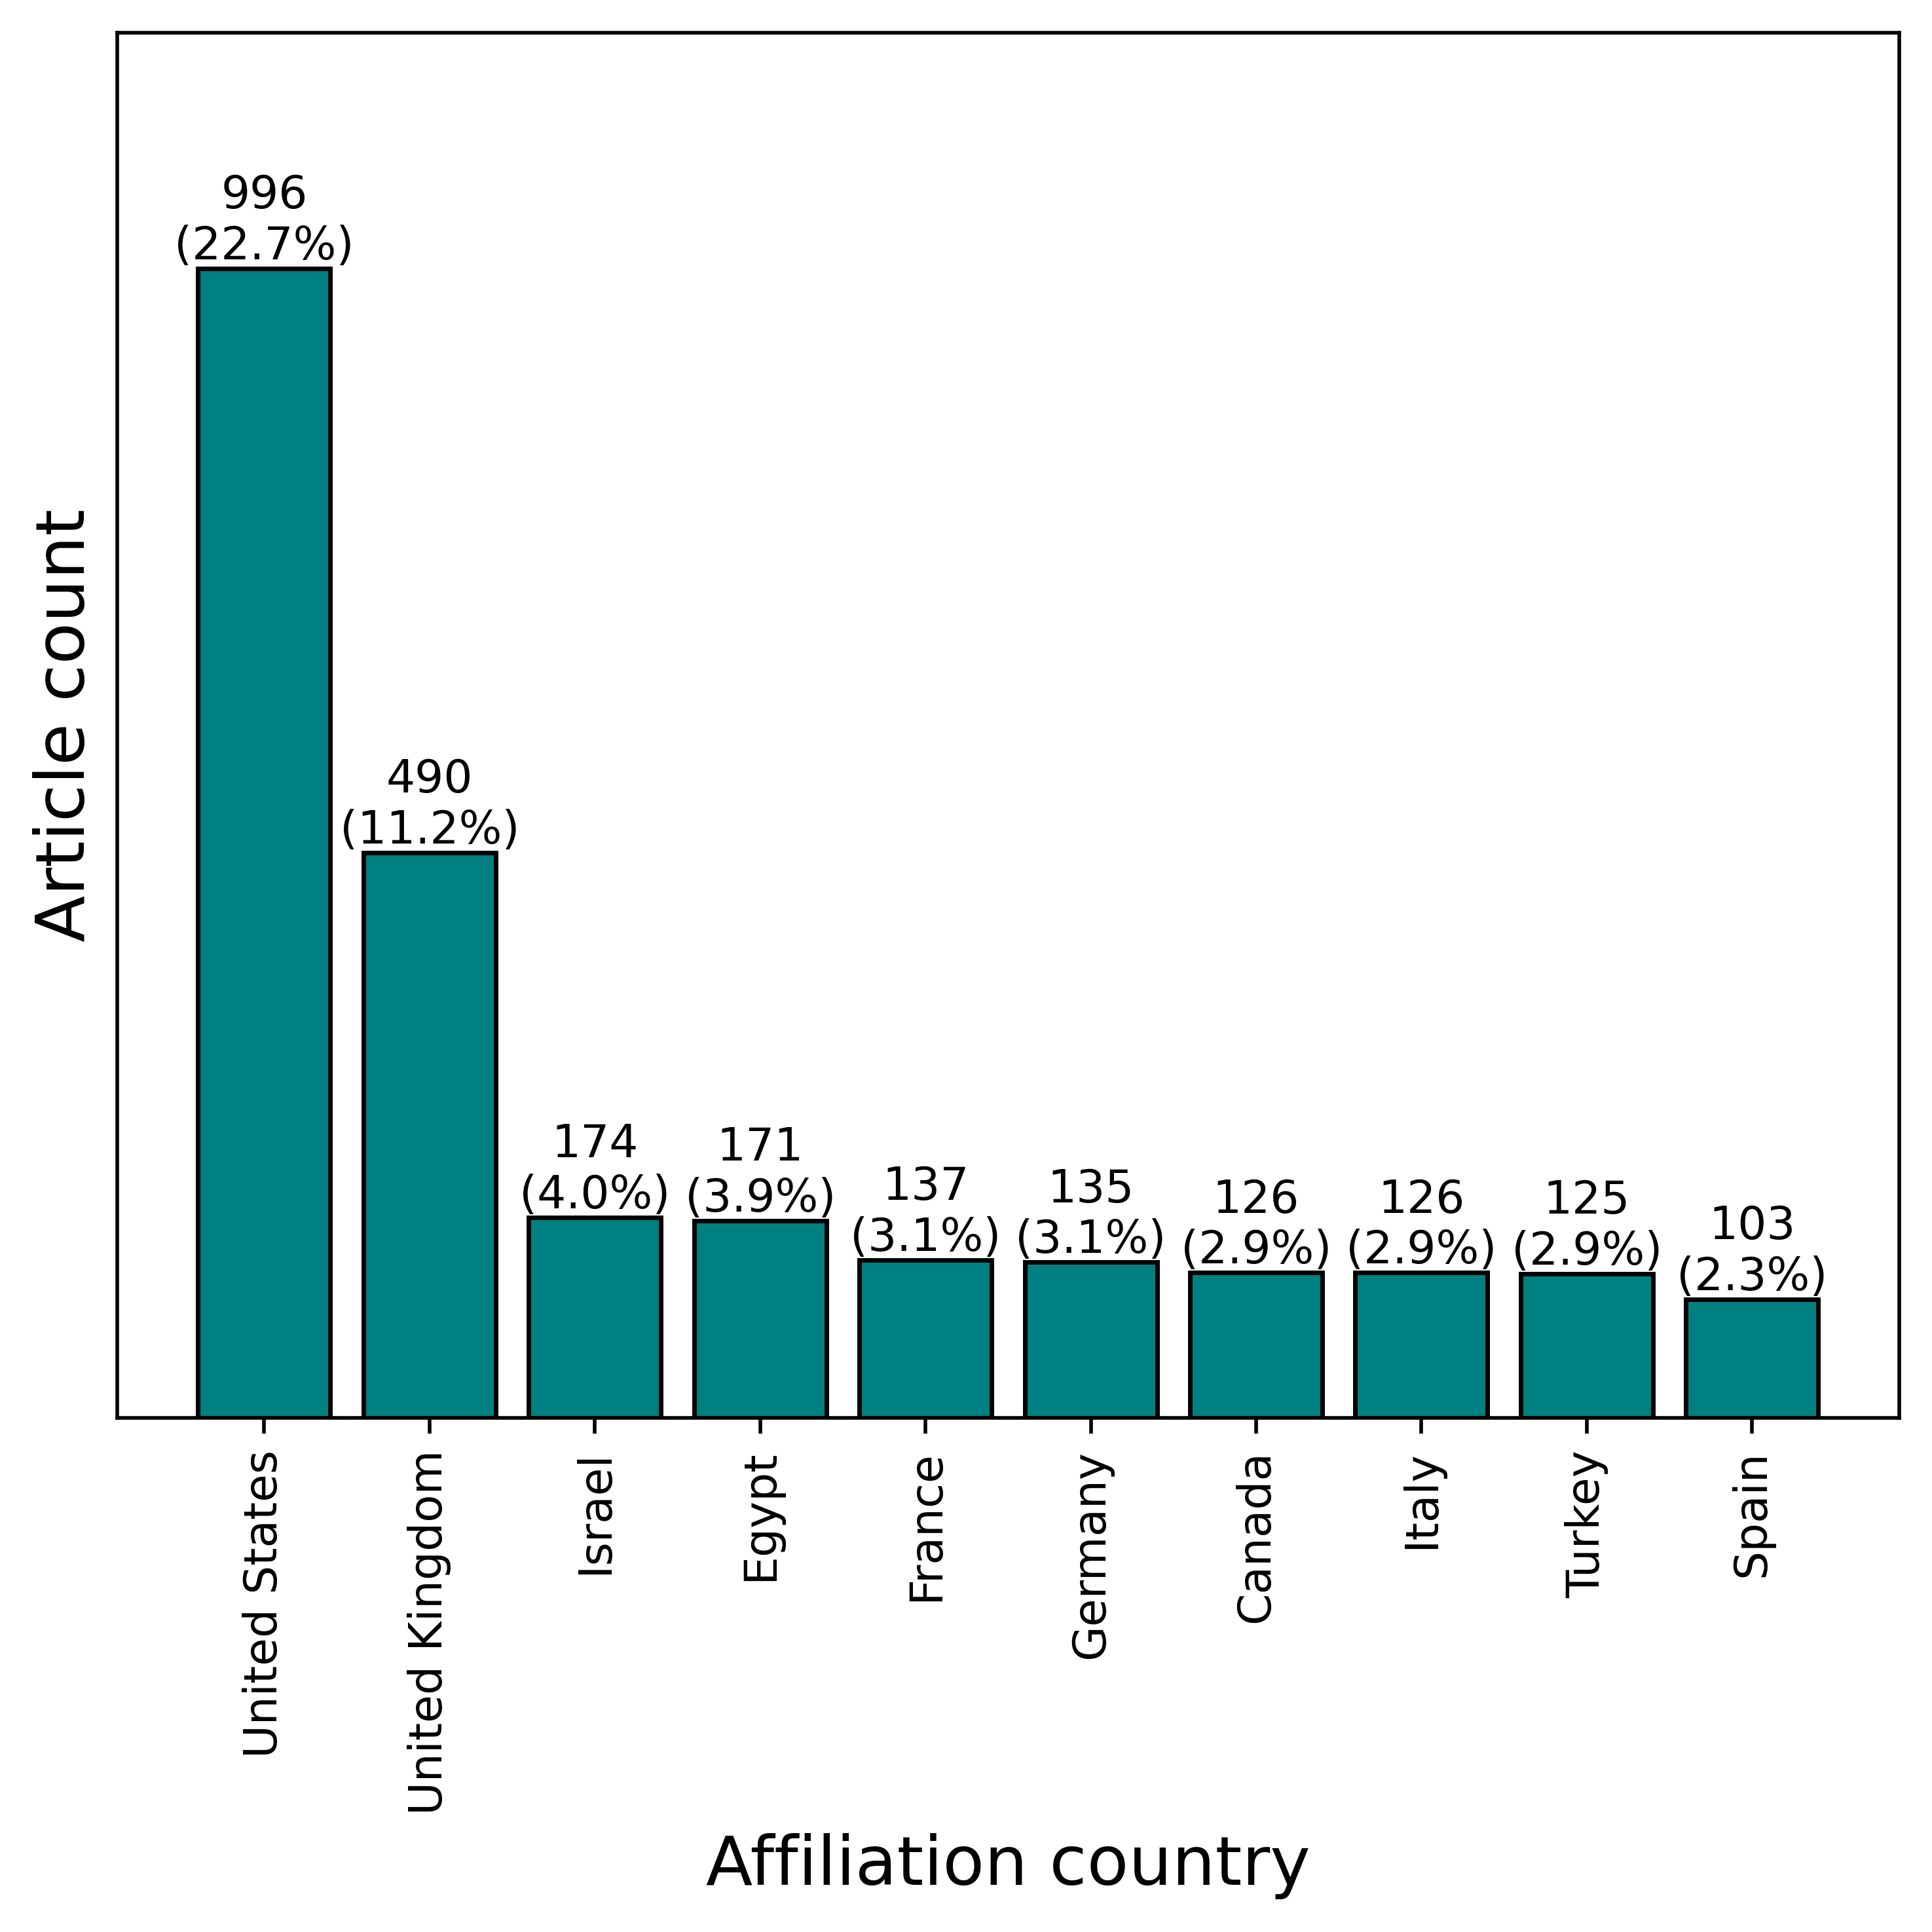

In [50]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=500)
ax=[ax]



df1=pd.read_csv(r"C:\Users\Yasaman\Downloads\Scopus-10-Analyze-Country.csv", skiprows=6).rename(columns={'Unnamed: 1':'count'})
sns.barplot(data=df1[:10], x='COUNTRY/TERRITORY', y='count', ax=ax[0])


total = sum(df1['count'])

shares= [value / total * 100 for value in df1['count']]
bars = ax[0].bar(np.arange(0,10,1), df1['count'][:10],edgecolor='k', color='teal')

# Annotate bars with numbers and shares
for i, bar in enumerate(bars):
    height = bar.get_height().round(1)
    
    # Number and share for 'before' bars
    ax[0].text(bar.get_x() + bar.get_width() / 2.0, height, 
            f'{height}\n({shares[i]:.1f}%)', ha='center', va='bottom')
ax[0].set_xticks(np.arange(0,10,1), df1['COUNTRY/TERRITORY'][:10].values, rotation=90 )
ax[0].set_ylim(0,1200)
ax[0].set_yticks([])

ax[0].set_ylabel('Article count', fontsize=15)
ax[0].set_xlabel('Affiliation country', fontsize=15)





fig.tight_layout()
fig.savefig('AS_related_aff.pdf', bbox_inches='tight')

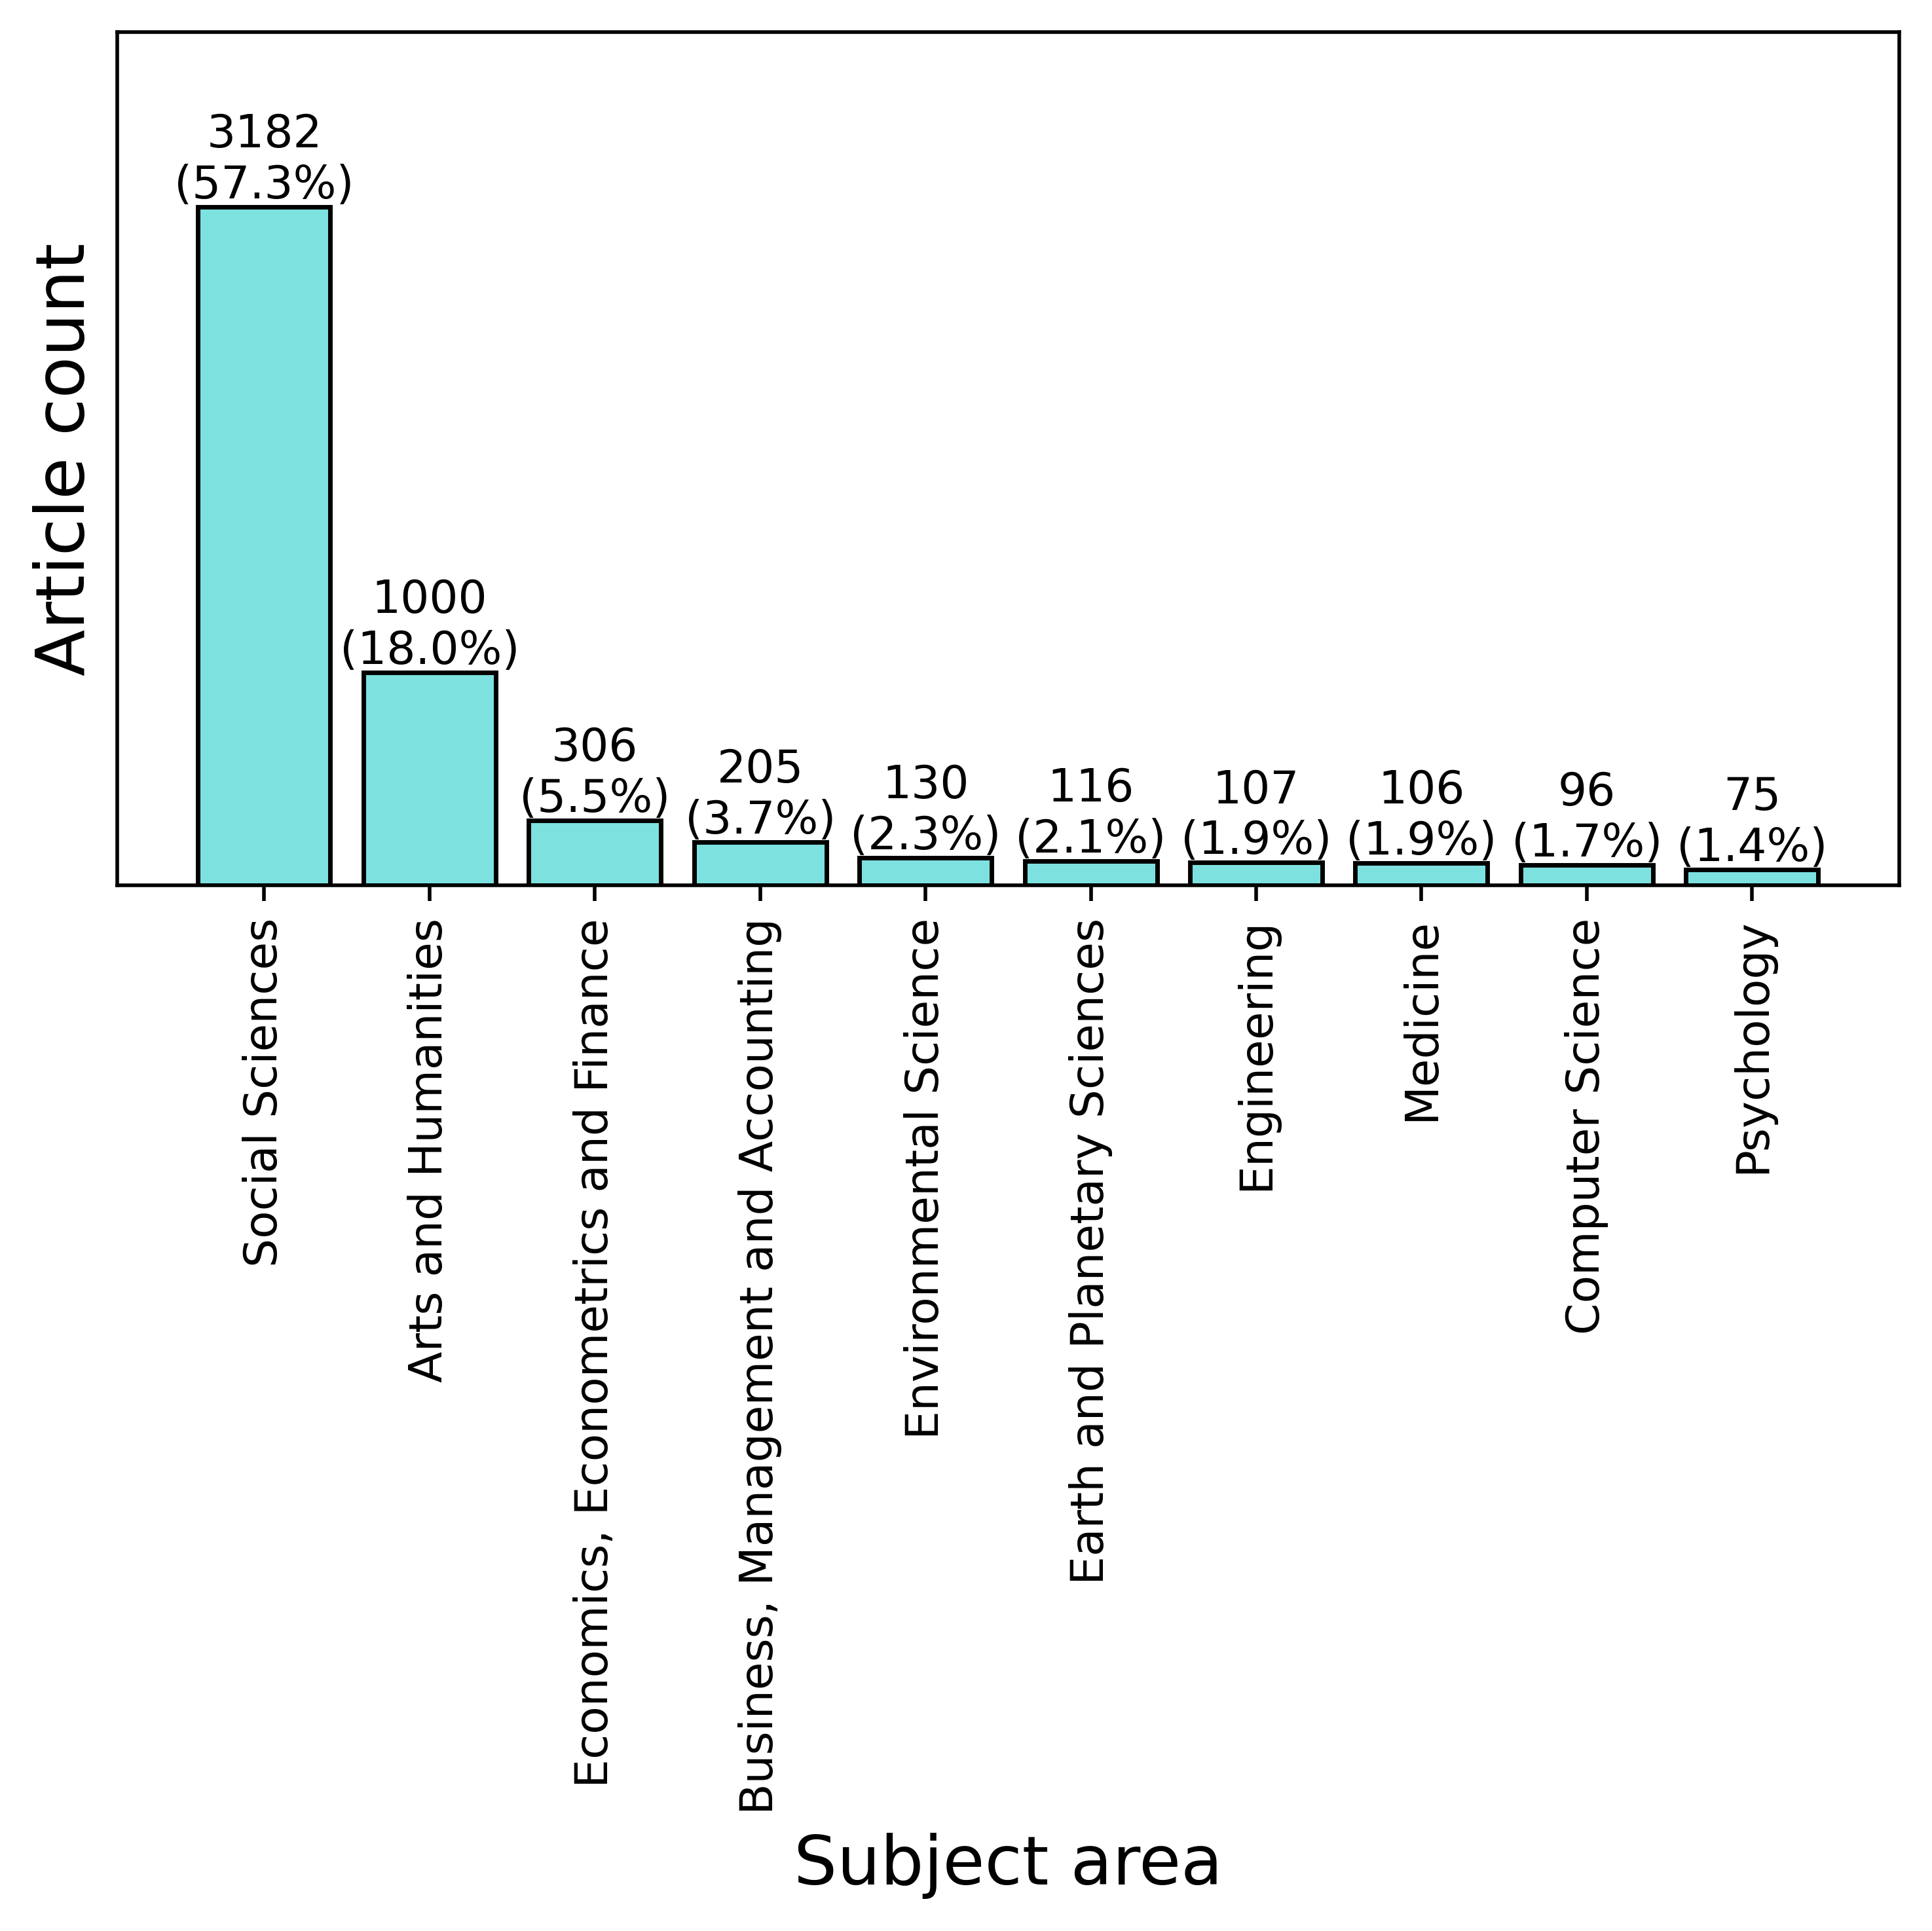

In [49]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=500)

df2=pd.read_csv(r"C:\Users\Yasaman\Downloads\Scopus-10-Analyze-Subject.csv", skiprows=6).rename(columns={'Unnamed: 1':'count'})
physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP','MULT']
df2=df2[~(df2['SUBJECT AREA'].isin(physical_sciences))]
total = sum(df2['count'])

shares= [value / total * 100 for value in df2['count']]
bars = ax.bar(np.arange(0,10,1), df2['count'][:10],edgecolor='k', color='#7DE1DF')

# Annotate bars with numbers and shares
for i, bar in enumerate(bars):
    height = bar.get_height().round(1)
    
    # Number and share for 'before' bars
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, 
            f'{height}\n({shares[i]:.1f}%)', ha='center', va='bottom')
ax.set_xticks(np.arange(0,10,1), df2['SUBJECT AREA'][:10].values, rotation=90 )
ax.set_ylim(0,4000)
ax.set_yticks([])

ax.set_ylabel('Article count', fontsize=15)
ax.set_xlabel('Subject area', fontsize=15)




fig.tight_layout()
fig.savefig('AS_related_SA.pdf', bbox_inches='tight')